<a href="https://colab.research.google.com/github/yanj227/beautifulsoup_test/blob/main/%E7%88%AC%E8%9F%B2ptt%E6%A8%99%E9%A1%8C%E5%88%86%E6%9E%90(%E5%A4%9A%E9%A0%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import jieba
import csv
import operator
from collections import Counter

In [4]:
#詞典庫
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/data/dict.txt')

In [5]:
#停用字
with open('/content/drive/MyDrive/Colab Notebooks/data/stop.txt') as f:
  stops = f.read().split('\n')

In [27]:
#八卦版網址
#res = 抓原始碼，文字化
URL = "https://www.ptt.cc/bbs/Gossiping/index.html"
res = requests.get(URL).text

In [28]:
res#出現18歲警告

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>批踢踢實業坊</title>\n\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">\n\n\n\n\n\t</head>\n    <body>\n\t\t\n<div class="bbs-screen bbs-content">\n    <div class="over18-notice">\n        <p>本網站已依網站內容分級規定處理</p>\n\n        <p>警告︰您即將進入之看板內容需滿十八歲方可瀏覽。</p>\n\n        <p>若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。</p>\n    </div>\n</div>\n\n<div class="bbs-screen bbs-content cent

In [29]:
#透過
cookie = {'over18':'1'}
r = requests.get(URL,cookies=cookie).content
soup = BeautifulSoup(r, 'html.parser')
print(soup)

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>
<link href="//images.ptt.cc/bbs/v2.27/bbs-common.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-custom.css" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print" rel="stylesheet" type="text/css"/>
</head>
<body>
<div id="topbar-container">
<div class="bbs-content" id="topbar">
<a href="/bbs/" id="logo">批踢踢實業坊</a>
<span>›</span>
<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
<a class="right small" href="/about.html">關於我們</a>
<a class="right small" href="/contact.html">聯絡資訊</a>
</div>
</d

In [46]:
#印出一頁的所有標題
title = soup.find_all("div", class_="title")
for i in title:
  if i.find('a')!=None:
    print(i.a.text)


[問卦] 告訴蘿拉我愛她
[問卦]  nft 沒有成本到底是誰在買
[問卦] 國片最頂哪一部?
[問卦] 為什麼 EE 那麼基八又欠幹 !?
Re: [新聞] 指揮中心將請新北提正式報告 還原恩恩案
[問卦] 日本田徑阿北攝影師 專攝女選手
Re: [問卦] 為何大家在六年後都不太抱怨了?
[問卦] 方文山的版稅大概有多少？
Re: [新聞] 蔡英文「10年電價不大調整」破功　賴清德
Re: [問卦] 現在買省油車CP值是不是最高？
[公告] 八卦板板規(2022.02.21)
[公告]    ／　＼六月份置底閒聊區


In [47]:
last_url = soup.select('a[class="btn wide"]')
last_url
#列表型態

[<a class="btn wide" href="/bbs/Gossiping/index1.html">最舊</a>,
 <a class="btn wide" href="/bbs/Gossiping/index39048.html">‹ 上頁</a>,
 <a class="btn wide" href="/bbs/Gossiping/index.html">最新</a>]

In [48]:
last_page_list =[]
for url in last_url:
  last_page_list.append(url['href'])

In [49]:
last_page_list

['/bbs/Gossiping/index1.html',
 '/bbs/Gossiping/index39048.html',
 '/bbs/Gossiping/index.html']

In [50]:
last_url = last_page_list[1]
last_url

'/bbs/Gossiping/index39048.html'

In [51]:
last_page_num=int(''.join([x for x in last_url if x.isdigit()]))
pageNum = last_page_num
pageNum#頁數

39048

In [52]:
df = pd.DataFrame()  #暫存當頁資料，換頁時即整併到dfAll
dfAll= pd.DataFrame() #存放所有資料

In [53]:

title_name = []
title = soup.find_all("div", class_="title")
for i in title: 
  if i.find('a')!=None:
    print(i.a.text)
    title_name.append(i.a.text)
  

[問卦] 告訴蘿拉我愛她
[問卦]  nft 沒有成本到底是誰在買
[問卦] 國片最頂哪一部?
[問卦] 為什麼 EE 那麼基八又欠幹 !?
Re: [新聞] 指揮中心將請新北提正式報告 還原恩恩案
[問卦] 日本田徑阿北攝影師 專攝女選手
Re: [問卦] 為何大家在六年後都不太抱怨了?
[問卦] 方文山的版稅大概有多少？
Re: [新聞] 蔡英文「10年電價不大調整」破功　賴清德
Re: [問卦] 現在買省油車CP值是不是最高？
[公告] 八卦板板規(2022.02.21)
[公告]    ／　＼六月份置底閒聊區


In [54]:
df = pd.DataFrame(title_name)

In [55]:
df.to_csv('PTT_title.csv')

In [56]:
with open('/content/PTT_title.csv', encoding = 'utf-8-sig') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    row = str(row)
    corpus = []
    corpus += [t for t in jieba.cut(row, cut_all = False) if t not in stops]

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/data/dict.txt ...
Dumping model to file cache /tmp/jieba.u06467e04edbba6061bcdc76133ae0c7c.cache
Loading model cost 1.389 seconds.
Prefix dict has been built successfully.


In [57]:
with open('/content/PTT_title.csv', encoding='utf-8-sig') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        row = str(row)
        corpus = []                # corpus 語料庫
        # 開始結jieba分詞並去除不要的字
        # cut_all=False 精确模式
        corpus += [t for t in jieba.cut(row, cut_all=False) if t not in stops]
        # 創個空的dictionary
        dic = {}
        for ele in corpus:
            if ele not in dic:
                dic[ele] = 1
            else:
                dic[ele] = dic[ele] + 1
        # 顯示切字的結果
        sorted_word = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
        print(sorted_word)
        with open('te.csv', 'a', encoding='utf-8-sig') as wf2:
            for ele in sorted_word:
                # 這行是表示我要2個字以上的句子
                if len(ele[0]) >= 2:
                    world = ele[0] + ','
                    wf2.write(world)

[("'", 4), ('[', 1), (',', 1), (' ', 1), ('0', 1), (']', 1)]
[("'", 4), ('[', 2), (' ', 2), (']', 2), ('0', 1), (',', 1), ('問卦', 1), ('告訴', 1), ('蘿拉', 1), ('我', 1), ('愛', 1), ('她', 1)]
[("'", 4), (' ', 4), ('[', 2), (']', 2), ('1', 1), (',', 1), ('問卦', 1), ('nft', 1), ('成本', 1), ('到底', 1), ('誰', 1), ('在', 1), ('買', 1)]
[("'", 4), ('[', 2), (' ', 2), (']', 2), ('2', 1), (',', 1), ('問卦', 1), ('國片', 1), ('最頂', 1), ('哪', 1), ('一部', 1), ('?', 1)]
[(' ', 5), ("'", 4), ('[', 2), (']', 2), ('3', 1), (',', 1), ('問卦', 1), ('為什麼', 1), ('EE', 1), ('那麼', 1), ('基八', 1), ('又', 1), ('欠', 1), ('幹', 1), ('!', 1), ('?', 1)]
[("'", 4), (' ', 4), ('[', 2), (']', 2), ('4', 1), (',', 1), ('Re', 1), (':', 1), ('新聞', 1), ('指揮', 1), ('中心', 1), ('將請', 1), ('新北', 1), ('提', 1), ('正式', 1), ('報告', 1), ('還原', 1), ('恩恩案', 1)]
[("'", 4), (' ', 3), ('[', 2), (']', 2), ('5', 1), (',', 1), ('問卦', 1), ('日本', 1), ('田徑', 1), ('阿北', 1), ('攝影師', 1), ('專攝', 1), ('女', 1), ('選手', 1)]
[("'", 4), (' ', 3), ('[', 2), (']', 2), ('6',

In [58]:
house = open('te.csv', encoding='utf-8-sig').read()
# 將讀取的檔案內之字單獨分開
list1 = house.split(',')
# 計算出現次數
dir1 = Counter(list1)

In [59]:
list1

['問卦',
 '告訴',
 '蘿拉',
 '問卦',
 'nft',
 '成本',
 '到底',
 '問卦',
 '國片',
 '最頂',
 '一部',
 '問卦',
 '為什麼',
 'EE',
 '那麼',
 '基八',
 'Re',
 '新聞',
 '指揮',
 '中心',
 '將請',
 '新北',
 '正式',
 '報告',
 '還原',
 '恩恩案',
 '問卦',
 '日本',
 '田徑',
 '阿北',
 '攝影師',
 '專攝',
 '選手',
 'Re',
 '問卦',
 '為何',
 '大家',
 '六年',
 '抱怨',
 '問卦',
 '方文山',
 '版稅',
 '大概',
 '有多少',
 'Re',
 '新聞',
 '蔡英文',
 '10',
 '電價',
 '不大',
 '調整',
 '破功',
 'u3000',
 '賴清德',
 'Re',
 '問卦',
 '現在',
 '省油',
 'CP',
 '10',
 '公告',
 '八卦板',
 '板規',
 '2022.02',
 '21',
 '11',
 '公告',
 'u3000',
 '六月',
 '份置',
 '閒聊',
 '']

In [60]:
# 將值寫入csv檔中
with open('te1.csv', encoding='utf-8-sig', mode='w') as fp:
    fp.write('關鍵字,值,\n')
    for tag, count in dir1.items():
        fp.write('{},{}\n'.format(tag, count))

In [61]:
# 讀取剛剛寫入的csv檔
df = pd.read_csv('te1.csv', index_col="值")
df

,關鍵字,Unnamed: 2
值,,
8,問卦,NaN
1,告訴,NaN
1,蘿拉,NaN
1,nft,NaN
1,成本,NaN
1,到底,NaN
1,國片,NaN
1,最頂,NaN
1,一部,NaN


In [62]:
# 取出前10個討論最多的詞
df = df.sort_index(axis=0, ascending=False)[:10]
df

,關鍵字,Unnamed: 2
值,,
8,問卦,NaN
4,Re,NaN
2,u3000,NaN
2,10,NaN
2,公告,NaN
2,新聞,NaN
1,抱怨,NaN
1,方文山,NaN
1,版稅,NaN


In [63]:
# 存檔
df.to_csv('te2.csv', encoding='utf-8-sig')

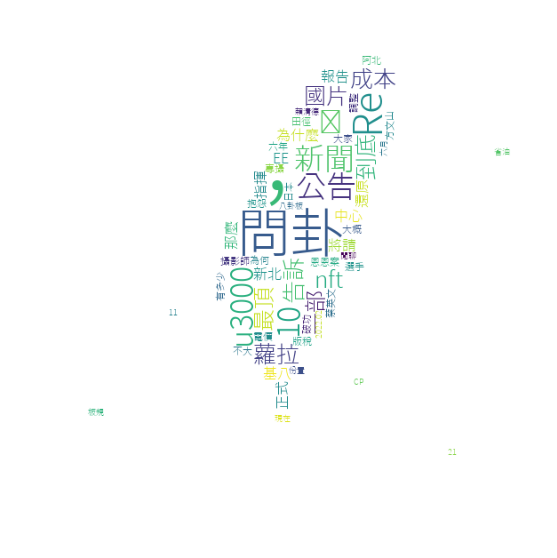

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np
text = open('te.csv', "r",encoding="utf-8").read()
#with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
  
terms = []
for t in jieba.cut(text, cut_all=False):
    if t not in stops:
        terms.append(t)
diction = Counter(terms)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)

#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/data/文字探勘/台灣.jpg")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 

wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud.png")